<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Brutyan%20Ruben/2_1_2_%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8(%D1%81_VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка библиотек

In [ ]:
import os # Для работы с файлами

from tensorflow.keras.models import Sequential                                                                 # абстрактный класс базовой модели сети от кераса
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Flatten  # слои(нормализации, регуляризации и т.д)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator             # модуль ImageDataGenerator из библиотеки tensorflow

import matplotlib.pyplot as plt                                                 # для создания графиков и визуализаций в Python
import random                                                                   # для генерации случайных чисел
from PIL import Image                                                           # методы для отрисовки изображений, обработки и манипулирования изображениями

# Начальные данные:

## Создание папок

In [ ]:
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/augment_test'               # создаём папку Dataset
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_1p'      # создаём папку train - обучающие фото
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_2m'      # создаём папку test - тестовые фото

## Начальные переменные

In [ ]:
import os # Для работы с файлами

# Параметры для ImageDataGenerator:
batch_size = 32
img_height = 675
img_width = 450
# train_dir = '/content/drive/MyDrive/НетОптик/Dataset/train'
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/test'
test_dir_1p = '/content/drive/MyDrive/НетОптик/Dataset/Копия_test_1p'               # папка только для клонирования (промежуточная)
test_dir_2m = '/content/drive/MyDrive/НетОптик/Dataset/Копия_test_2m'               # папка только для клонирования (промежуточная)
augment_dir = '/content/drive/MyDrive/НетОптик/Dataset/augment_test'                # папка для клонов (новые фото)
augment_dir_1p = '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_1p'    # папка для клонов (пластик)
augment_dir_2m = '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_2m'    # папка для клонов (метал)

## Генератор - _Test

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=12,                            # случайные повороты в диапазоне [-12, 12] градусов
    width_shift_range=5.0,                        # случайное горизонтальное смещение в диапазоне [-5.0, 5.0]
    height_shift_range=5.0 ,                      # случайное вертикальное смещение в диапазоне [-5.0, 5.0]
    zoom_range=0.2,                               # случайное масштабирование в диапазоне [0.8, 1.2]
    horizontal_flip=True,                         # Случайное отражение изображений по горизонтали
    # validation_split=0.2                          # доля отводимая на валидацию от общего количества фото для валидации
)
# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,                                     # Путь к тестовой выборке
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False                                # Перемешивание выборки
)

Found 36 images belonging to 2 classes.


# КЛОНИРОВАНИЕ изображений

## Аугментация. Способ 1

In [ ]:
import os
import numpy as np
import cv2

generated_images_count = 0


for i in range(len(test_generator)):
    batch = test_generator[i]  # Генерация очередной порции изображений
    images = batch[0]
    labels = batch[1]

    batch_size = images.shape[0]  # Размер текущей порции изображений

    for j in range(batch_size):
        image = images[j].astype(np.uint8)  # Преобразование изображения обратно в тип uint8
        label = labels[j]

        image_path = os.path.join("/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_2m", f"2m_{generated_images_count}.jpg")
        cv2.imwrite(image_path, image)                                                                                                      # Сохранение изображения в папку

        generated_images_count += 1

print("Общее количество сгенерированных изображений:", generated_images_count)

Общее количество сгенерированных изображений: 18


## Аугментация. Способ 2

In [ ]:
desired_num_images = 35

# Создаем папку "22", если она еще не существует
output_dir = "/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_2m"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Генерируем и сохраняем изображения
num_images = 0
for i, (images, _) in enumerate(test_generator):
    for j in range(len(images)):
        image = images[j]

        # Пример сохранения изображения в папку
        image_path = os.path.join(output_dir, f"2-m_{num_images}.jpg")
        cv2.imwrite(image_path, image)  # Сохранение изображения в папку "22"

        num_images += 1

    # Выходим из цикла после генерации нужного количества изображений
    if num_images >= desired_num_images:
        break

print(f"Количество сгенерированных изображений: {num_images}")

Количество сгенерированных изображений: 36


### **Проверка:**

In [ ]:
# Размерность тензора на основе изображения для входных данных в нейронную сеть (выбираем вид backend Tensorflow, channels_last)
input_shape = (img_width, img_height, 3)

# Пути к папкам классов для Test

TEST_IMAGE_PATH_1p = '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_1p'
TEST_IMAGE_PATH_2m = '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_2m'

# Список имен классов для Test
TEST_CLASS_LIST = sorted(os.listdir(augment_dir))

# Количество классов для Test
TEST_CLASS_COUNT = len(TEST_CLASS_LIST)

test_samples = len(os.listdir(TEST_IMAGE_PATH_1p)) + len(os.listdir(TEST_IMAGE_PATH_2m))

# Проверка результата
print(f'Метки проверочных классов TEST_CLASS_LIST: {TEST_CLASS_LIST}\n')
print(f'Количество проверочных классов TEST_CLASS_COUNT: {TEST_CLASS_COUNT}\n')
print(f"Количество Test(аугментированных)-картинок: {test_samples}")

Метки проверочных классов TEST_CLASS_LIST: ['class_1p', 'class_2m']

Количество проверочных классов TEST_CLASS_COUNT: 2

Количество Test(аугментированных)-картинок: 108


### *Имена файлов картинок*

In [ ]:
# Список файлов для каждого класса Test
print("\nПодпапки в папке Test для проверки:\n")
for test_name_folder in TEST_CLASS_LIST:
  test_file_name = os.listdir(f'{augment_dir}/{test_name_folder}/')
  print(f'В папке "{test_name_folder}" всего {len(test_file_name)} картинок:\n{test_file_name}')


Подпапки в папке Test для проверки:

В папке "class_1p" всего 54 картинок:
['1p_0.jpg', '1p_1.jpg', '1p_2.jpg', '1p_3.jpg', '1p_4.jpg', '1p_5.jpg', '1p_6.jpg', '1p_7.jpg', '1p_8.jpg', '1p_9.jpg', '1p_10.jpg', '1p_11.jpg', '1p_12.jpg', '1p_13.jpg', '1p_14.jpg', '1p_15.jpg', '1p_16.jpg', '1p_17.jpg', '1-p_0.jpg', '1-p_1.jpg', '1-p_2.jpg', '1-p_3.jpg', '1-p_4.jpg', '1-p_5.jpg', '1-p_6.jpg', '1-p_7.jpg', '1-p_8.jpg', '1-p_9.jpg', '1-p_10.jpg', '1-p_11.jpg', '1-p_12.jpg', '1-p_13.jpg', '1-p_14.jpg', '1-p_15.jpg', '1-p_16.jpg', '1-p_17.jpg', '1-p_18.jpg', '1-p_19.jpg', '1-p_20.jpg', '1-p_21.jpg', '1-p_22.jpg', '1-p_23.jpg', '1-p_24.jpg', '1-p_25.jpg', '1-p_26.jpg', '1-p_27.jpg', '1-p_28.jpg', '1-p_29.jpg', '1-p_30.jpg', '1-p_31.jpg', '1-p_32.jpg', '1-p_33.jpg', '1-p_34.jpg', '1-p_35.jpg']
В папке "class_2m" всего 54 картинок:
['2-m_0.jpg', '2-m_1.jpg', '2-m_2.jpg', '2-m_3.jpg', '2-m_4.jpg', '2-m_5.jpg', '2-m_6.jpg', '2-m_7.jpg', '2-m_8.jpg', '2-m_9.jpg', '2-m_10.jpg', '2-m_11.jpg', '2-m_12.

# МОДЕЛЬ 2

# *Загрузка модели-2*

Загрузка истории:

In [ ]:
import pickle

with open('/content/drive/MyDrive/НетОптик/Save_models/history-2.pickle', 'rb') as file:
    history = pickle.load(file)

Загрузка модели-2

In [ ]:
from tensorflow.keras.models import load_model

print('Загружаем сеть')

# Загружаем модель из файла
model = load_model("/content/drive/MyDrive/НетОптик/Save_models/net_optic_VGG16.h5")

print('Загрузка сети из файла net_optic_VGG16.h5 завершена')

Загружаем сеть
Загрузка сети из файла net_optic_VGG16.h5 завершена


# Проверка сети вручную

1/1 [==============================] - 5s 5s/step


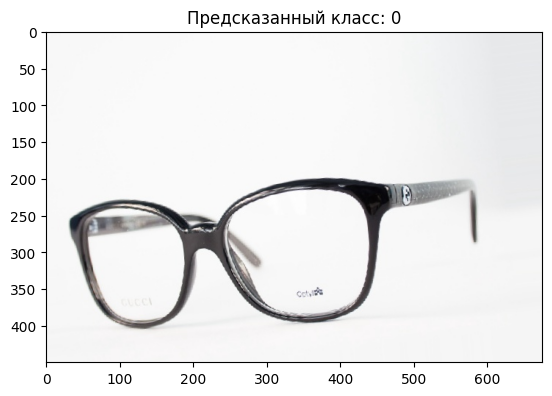

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# image_path_2m = '/content/drive/MyDrive/НетОптик/Dataset/augment_test/class_1p/1p_17.jpg'

filenames_1p = 'class_1p/1p_7.jpg'
filenames_2m = 'class_2m/2m_10.jpg'
image_path_1p = augment_dir + '/' + filenames_1p
image_path_2m = augment_dir + '/' + filenames_2m

# Загрузка тестовой картинки
test_image = image.load_img(image_path_1p, target_size=(img_width, img_height))
# test_image = image.load_img(image_path_2m, target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Предсказание класса тестовой картинки с использованием обученной модели
pred = model.predict(test_image)
pred_class = int(pred[0])

# Отображение тестовой картинки и предсказанного класса
plt.imshow(test_image[0].astype(np.uint8))
plt.title(f'Предсказанный класс: {pred_class}')
plt.show()

# График confusion_matrix

## X_ , Y_ выборки:

Сгенерируем выборку в виде уже готовых X_test, Y_test, с помощью готового генератора train_generator использующего изображения с диска

In [ ]:
num = 0
for x,y in test_generator:
    if  num == 0:
       X_test = x
       Y_test = y
    else:
       X_test = np.concatenate([X_test,x])
       Y_test = np.concatenate([Y_test,y])
    num += 1
    if  num == 6:
      break


print('Общее количество образцов, высота-ширина изображений, количество цветовых каналов:')
print('X_test:', X_test.shape)                                                          # Размер выборок
print('Общее количество образцов:')
print('Y_test:', Y_test.shape)

Общее количество образцов, высота-ширина изображений, количество цветовых каналов:
X_test: (108, 450, 675, 3)
Общее количество образцов:
Y_test: (108,)


In [ ]:
print(Y_test)

[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 416s 97s/step


4/4 [==============================] - 406s 96s/step


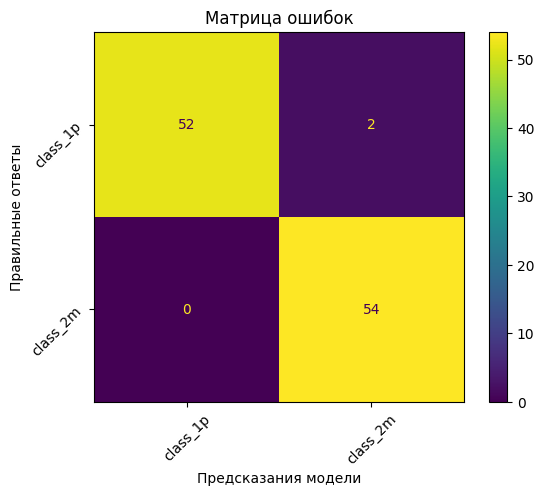

In [ ]:
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# # Получение предсказанных значений модели для тестового набора данных
# y_pred = model.predict(test_generator)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()                    # округление до целых чисел и преобразование в одномерный массив

# # Получение истинных значений тестового набора данных
# y_test = test_generator.classes
y_test = Y_test

# Построение confusion matrix
cm = confusion_matrix(y_test, y_pred)

TEST_CLASS_LIST = sorted(os.listdir(test_dir))

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
display_label = np.arange(len(TEST_CLASS_LIST))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_label)
disp.plot()

plt.title('Матрица ошибок')
plt.xticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.yticks(display_label, TEST_CLASS_LIST, rotation=45)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')
plt.show()